In [1]:
from diffusers import StableDiffusionPipeline, DDIMScheduler
import torch
import matplotlib.pyplot as plt
import math

/home/ubuntu/miniforge3/envs/diffusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set up the Stable Diffusion pipeline
model_id = "CompVis/stable-diffusion-v1-4"
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32, safety_checker=None)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 12.02it/s]
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:09<00:00,  5.08it/s]


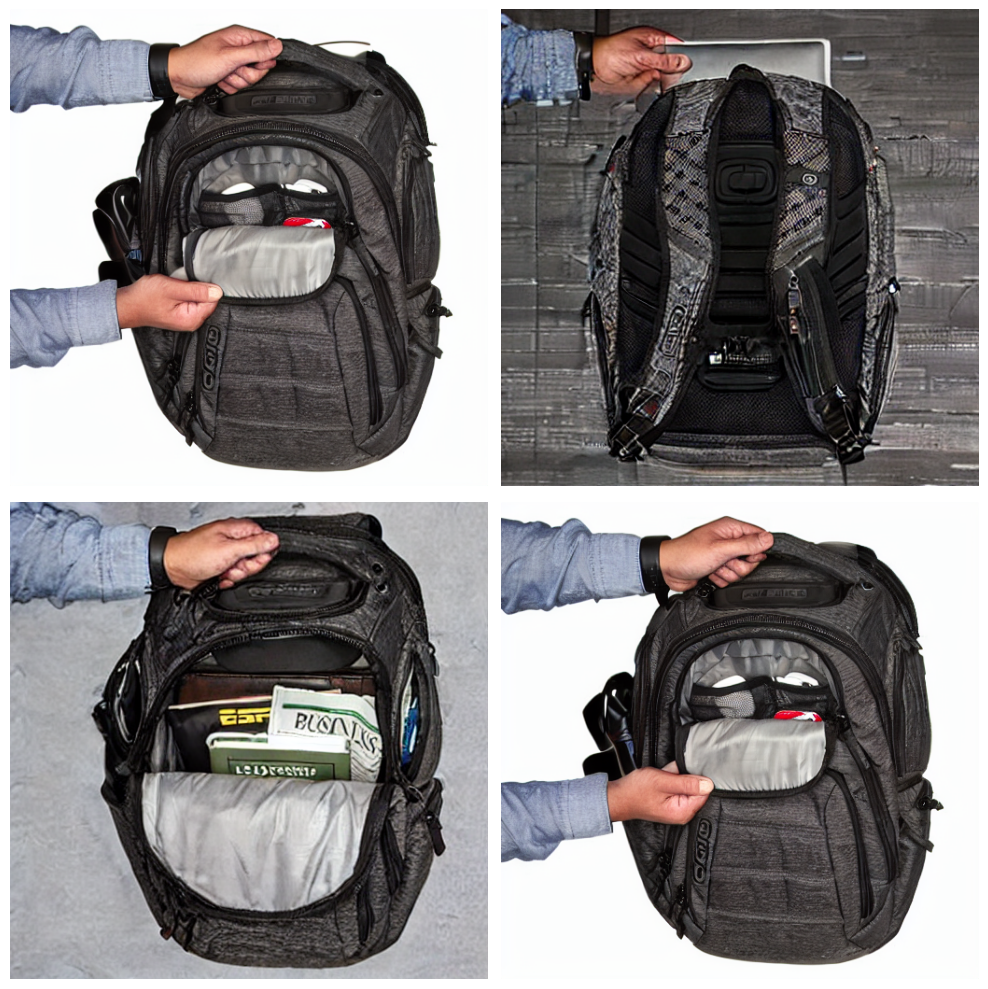

In [5]:
# Set the batch size and prompt
BATCH_SIZE = 4
prompt = "Renegade RSS Laptop Backpack - View 31"

# Generate images
with torch.autocast('cuda'):
    images = pipe([prompt] * BATCH_SIZE).images

# Calculate the number of rows and columns for the grid
num_rows = int(math.sqrt(BATCH_SIZE))
num_cols = math.ceil(BATCH_SIZE / num_rows)

# Display the generated images in a grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
axs = axs.flatten()

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')

# Remove any unused subplots
for i in range(len(images), num_rows * num_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()